# Data FIESA

In [33]:
from obspy import read, UTCDateTime
from obspy import read_inventory
from obspy.signal import PPSD

In [34]:
st = read("FIESA.mseed")
print(st)

1 Trace(s) in Stream:
CH.FIESA..HHZ | 2018-03-01T00:00:00.000000Z - 2018-03-02T00:00:00.000000Z | 200.0 Hz, 17280001 samples


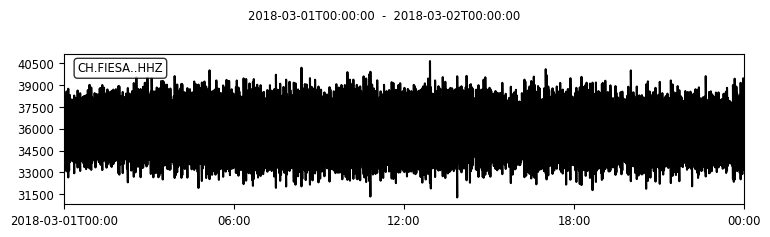

In [35]:
st.plot()

In [36]:
len(st)
tr=st[0] #assign fisrt and only trace to new variable
print(tr)

CH.FIESA..HHZ | 2018-03-01T00:00:00.000000Z - 2018-03-02T00:00:00.000000Z | 200.0 Hz, 17280001 samples


In [37]:
print(tr.stats)

         network: CH
         station: FIESA
        location: 
         channel: HHZ
       starttime: 2018-03-01T00:00:00.000000Z
         endtime: 2018-03-02T00:00:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 17280001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 29300, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 15001600})


In [53]:
inv = read_inventory("Package_1538472206844_0.xml")
print(inv)

Inventory created at 2018-10-02T09:53:19.000000Z
	Sending institution: SeisComP3 (SED)
	Contains:
		Networks (1):
			CH
		Stations (1):
			CH.FIESA (Fiescheralp, VS)
		Channels (3):
			CH.FIESA..HHZ, CH.FIESA..HHN, CH.FIESA..HHE


No handles with labels found to put in legend.


Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 2.51787e+09 defined at 1.000 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1.67772e+06
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1


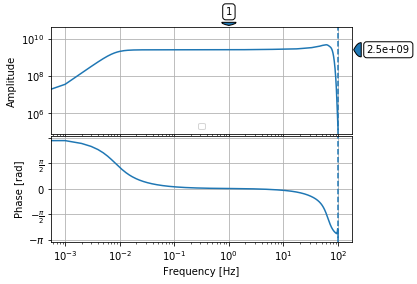

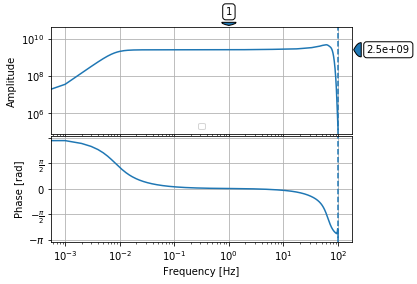

In [59]:
net=inv[0]
net
sta=net[0]
sta
cha=sta[0]
cha
print(cha.response)
resp=inv[0][0][0].response
resp.plot(0.001, output="VEL")

In [62]:
ppsd = PPSD(tr.stats, metadata=inv)

In [63]:
ppsd.add(st)

True

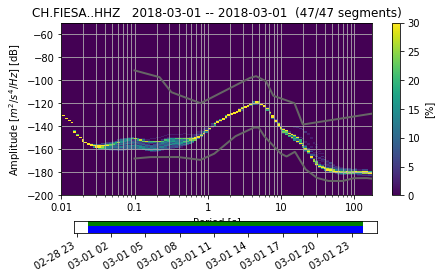

In [67]:
ppsd.plot()

In [68]:
ppsd.plot("FIESA.png") 